In [ ]:
import numpy as np

# Tworzenie tablic w Numpy

Podstawowym typem danych w numpy jest tablica (array). Poniżej pokażę jak możemy utworzyć tablicę oraz kilka użytecznych funkcji.

In [ ]:
# tworzenie z listy 
tab = np.array( [1,2,3,4,5] )
print(tab)

In [ ]:
# dodanie elementu na koncu (niewskazane)
tab2 = np.append(tab, 6)
print(tab) # nie zmienia sie 
print(tab2) # nowa tablica

In [ ]:
# tablica 10 zer
tab = np.zeros(10)
print(tab)

In [ ]:
# tablica 10x10 zer
tab = np.zeros(shape=(10,10))
print(tab)

In [ ]:
# tablica z istniejącej listy
lista = [x**2 for x in range(10)]
tab = np.array(lista)
print(tab)

In [ ]:
# macierz jednostkowa
tab = np.eye(5)
print(tab)

In [ ]:
# tablica samych jedynek
tab = np.ones(10)
print(tab)

In [ ]:
# tablica w stylu range: liczby całkowite od 0 do 100 co 3
tab = np.arange(0, 100, 3)
print(tab)

In [ ]:
# tablica zawierająca N=10 równoodległych liczb rzeczywistych między -1 a 1
tab = np.linspace(-1, 1, 10)
print(tab)

In [ ]:
# tablica 1D 1000 liczb z rozkładu jednostajnego
from numpy.random import uniform
tab = uniform(size=1000)
# wypiszmy pierwsze 30 liczb
print(tab[:30])

In [ ]:
# sprawdzmy czy faktycznie rozkład jest jednostajny
import matplotlib.pyplot as plt
plt.hist(tab, 15)

In [ ]:
# tablica 2D (3x4) liczb losowych z rozkładu normalnego o sredniej 0 i odchyleniu 1
from numpy.random import normal
tab = normal(0, 1, size=(3,4))
print(tab)

# Rozmiary

Każda tablica ma swój kształt "shape". Jeżeli chcemy operować na kilku tablicach to musimy pamiętać, 
żeby ich rozmiary były odpowiednie, np. do mnożenia macierzowego. Poniżej pokażę kilka użytecznych funkcji.

In [ ]:
tab = np.arange(16)
print(tab)

In [ ]:
# wypiszmy rozmiar tab
print(tab.shape)

In [ ]:
# tab jest jendowymiarową tablicą, zróbmy z niej tablicę 4x4
tab = tab.reshape(4,4) 
print(tab.shape)
print(tab)

In [ ]:
# Stwórzmy drugą tablicę
tab2 = np.arange(-1, 15).reshape(4,4)
print(tab2)

In [ ]:
# Połączmy dwie tablice wzdluz osi 0
stab = np.stack([tab, tab2], axis=0)
print(stab)

In [ ]:
print(stab.shape)

In [ ]:
# Połączmy dwie tablice wzdluz osi 1
stab = np.stack([tab, tab2], axis=1)
print(stab)

In [ ]:
print(stab.shape)

In [ ]:
# spłaszczmy tablicę stab do 1D
print(stab.reshape(-1))
print()
# inny sposób
print(stab.flatten())

# Operacje na tablicach

Poniżej pokaże kilka podstawowych operacji na tablicach.

In [ ]:
# iterowanie
tab = np.arange(-5,5)
for em in tab:
    print(em)

In [ ]:
# dodawanie i odejmowanie
tab1 = np.arange(1,11)
print(tab1)
tab2 = np.arange(-10, 0)
print(tab2)
print(tab1+tab2)
print(tab1-tab2)

In [ ]:
# mnożenie przez liczbę
tab = np.eye(3)
print(tab*3)

In [ ]:
# transponowanie
tab = np.arange(6).reshape(2,3)
print(tab)
print()
print(tab.transpose())

In [ ]:
# transponowanie inny sposob
tab = np.arange(6).reshape(2,3)
print(tab)
print()
print(tab.T)

In [ ]:
# mnożenie macierzowe za pomocą operatora @
A = np.array([[1,0],[0, -1]])
B = np.array([[0,1],[1,0]])
print(A)
print()
print(B)
print()
print(A @ B)

In [ ]:
# mnozenie macierzowe za pomocą metody .dot
print(A.dot(B))

In [ ]:
# mnożenie element po elemencie
C = np.array([[1,2],[3,4]])
print(A * C)
print(B * C)

In [ ]:
# liczenie wyznacznika
M = [[1,2],[3,4]]
print(np.linalg.det(M))

In [ ]:
# odwracanie macierzy
A = [[4,0],[0,2]]
print(np.linalg.inv(A))

# Warunki logiczne i wybieranie danych

Poniżej pokażę jak można wybierać podzbiór danych z tablicy, na podstawie warunków logicznych.

In [ ]:
tab = np.arange(0, 30)
print(tab)

In [ ]:
# możemy używać operatorów "na tablicach" w wyniku dostajemy tablice wartości logicznych
print(tab%2==0) 

In [ ]:
# Używamy tablicy Prawda/Fałsz do stworzenia nowej tablicy z danych, dla których jest Prawda
cond = tab%2==0
print(tab[cond])

In [ ]:
# Możemy łączyć warunki stosując mnożenie element po elemencie
cond1 = tab%2 == 1
cond1.reshape(1, cond1.shape[0])
cond2 = tab>10
cond2.reshape(1, cond2.shape[0])
cond3 = tab<20
cond3.reshape(1, cond3.shape[0])
cond = cond1 * cond2 * cond3
print(cond)
print(tab[cond])

In [ ]:
# inny sposób to użycie np.where
print(np.where( np.sin(tab)>0 ) )

# Zadanie 1 -- Estymacja liczby PI metodą Monte Carlo

Symulacja Monte Carlo, nazywana również metodą Monte Carlo lub wielokrotną symulacją prawdopodobieństwa, jest metodą matematyczną stosowaną do określania możliwych skutków niepewnego zdarzenia. Metodę Monte Carlo wymyślili John von Neumann i Stanisław Ulam w czasie II wojny światowej w celu usprawnienia procesu podejmowania decyzji w niepewnych warunkach. Nazwa pochodzi od słynącego z kasyn osiedla Monako, ponieważ tak jak w grze w ruletkę podstawę modelowania stanowi tu element losowy.

Wykorzystamy metodę Monte Carlo do oszacowania liczby PI. Wyobraź sobie koło jednostkowe o środku w układzie współrzędnych. Na kole tym możemy opisać kwadrat o boku 2. Koło ma pole równe PI, natomiast kwadrat ma pole równe 4, zatem ich stosunek wynosi PI/4. Wyobraź sobie teraz, że wybierasz w sposób losowy punkt na kwadracie. Jeżeli punkt znajduje się wewnątrz koła to go zachowujesz, jeżeli poza kołem to odrzucasz. Następnie postępujesz w taki sam sposób z kolejnymi punktami. Przyjrzyj się poniższemu obrazkowi...

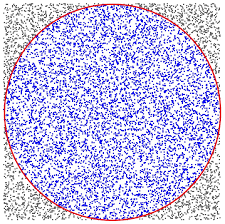

Prawdopodobieństwo można interpretować geometrycznie. Jeżeli szansa na wylosowanie jakiegoś punktu w kwadracie wynosi P=1, to szansa wylosowania punktu wewnątrz koła wynosi P', gdzie P' < P. Ile wynosi P'? Tyle co stosunek pola koła do pola kwadratu, czyli PI/4. Zatem możemy przeprowadzić następujący eksperyment:

1) Losujemy N punktów w kwadracie

2) Liczymy ile z nich znajduje się wewnątrz koła: M

3) Estymujemy PI = 4* M/N

**Napisz program, który dokona estymacji liczby PI metodą Monte Carlo. Wykorzystaj do tego bibliotekę numpy. Nie używaj żadnych pętli. Korzystając z matplotlib narysuj obrazek podobny do przedstawionego powyżej. Przetestuj dla różnych wartości N i zaobserwuj poprawę dokładności.**

### Rozwiązanie

# Zadanie 2 -- regresja liniowa

W fizyce i innych naukach zdarza się, że dane układają się wzdłuż prostej, jednakże z uwagi na niepewności pomiarowe nie da się narysować jednej prostej przechodzącej przez wszystkie punkty. Powstaje zatem problem: jaka prosta najlepiej opisuje obserwowany zbiór danych? Okazuje się, że ten problem jest na tyle prosty, iż posiada rozwiązanie analityczne zwane *regresją liniową*.

Generalnie, termin "regresja" oznacza problem opisania współzależności pomiędzy zmiennymi za pomocą funkcji matematycznej. W rozważanym przypadku funkcja jest liniowa, stąd regresja liniowa.

Niech X będzie wektorem **kolumnowym** zawierającym dwie **kolumny**: pierwsza to kolumna samych jedynek, druga zawiera współrzędne punktów pomiarowych na osi OX (jest ich N). Niech C będzie wektorem **kolumnowym**: C = [c0, c1].T

Wtedy 

Y = X * C (mnożenie macierzowe) 

reprezentuje równanie:

y_i = x_i * c1 + c0 

dla każdego i ze zbioru przykładów.

W przedstawionym problemie znamy X i Y, ale nie znamy C. Okazuje się, że istnieje prosty wzór analityczny wyznaczający optymalne wartości parametrów C:

C = (X' * X)^-1 * X' * Y

gdzie * oznacza mnożenie macierzowe, X' to transponowany wektor X, a A^-1 oznacza macierz odwrotną do A.

**Korzystając z numpy i powyższego wzoru zilustruj przykład działania regresji liniowej.** W tym celu:

1) wygeneruj dane na przedziale [-1,1] dla prostej y=0.5*x+0.1 przyjmując N=30

2) dodaj do nich szum z rozkładu Gaussa o średniej 0.0 i odchyleniu 0.1

3) znajdź optymalne wartości parametrów c0 i c1

4) narysuj na wykresie dane z rozrzutem statystycznym, *prawdziwą* prostą oraz prostą ze znalezionymi parametrami (patrz wykres poniżej, znalezione parametry mogą się różnić)

5) przetestuj co się stanie, gdy zmienisz odchylenie standardowe i liczbę generowanych punktów

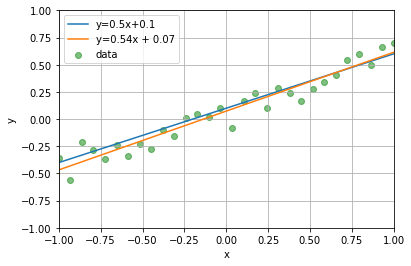

### Rozwiązanie

# Zadanie 3 -- regresja liniowa za pomocą sklearn

Regresji liniowej można używać również dla większej liczby wymiarów, tzn. dla funkcji f(x1, x2, ..., xn) o ile zależy ona liniowo od wszystkich zmiennych (inaczej wynik nie będzie za dobry -- źle wybrany model teoretyczny). Poniższy przykład pokazuje użycie bilbioteki sklearn do funkcji dwóch zeminnych x1 i x2. Zapoznaj się z przykładem i użyj implementacji w sklearn do danych wygenerowanych w poprzednim zadaniu. Sprawdź, że dopasowane parametry są takie same w obu przypadkach.

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(x, np.array([1, 2])) + 3
reg = LinearRegression().fit(x, y)

print('parametry {}'.format(reg.coef_))
print('parametr wolny {}'.format(reg.intercept_))
print('y(3,5)={}'.format(*reg.predict(np.array([[3, 5]]))))

### Rozwiązanie

# Zadanie 4 -- Support Vector Machine (SVM)

Regresja liniowa sprawdza się dobrze tylko dla danych opisywanych funkjcją liniową. Co jeżeli dane charakteryzują się większą złożonością? Wtedy trzeba użyć innych metod regresji, zaliczanych do tzw. *metod uczenia maszynowego*. Jedną z takich metod jest Maszyna Wektorów Nośnych. Tłumaczenie metod uczenia maszynowego wykracza poza ramy tego przedmiotu, ale chcę wam przekazać dobrą wiadomość: sklearn posiada wspólny interfejs dla wielu różnych metod. Dlatego już teraz jesteście w stanie użyć SVM do rozwiązania problemów, pomimo iż zapewne nie wiecie co to jest ani jak działa. Generalnie, powinniście wiedzieć jakich narzędzi użycwacie, ale tym razem po prsotu zaufajcie mi, że to narzędzie jest właściwe.

Poniższa komórka importuje SVM

In [ ]:
from sklearn.svm import SVR

Wykonaj następujące kroki:

1) Wygeneruj 30 iksów na przedziale [0, 2PI]

2) Dla każdego z nich policz wartość sin(X)

3) Niech Y = sin(X) + szum, gdzie szum jest z rozkładu normalnego o średniej 0 i odchyleniu 0.3

4) Dopasuj SVM do danych. W tym celu musisz powtórzyć kroki z poprzedniego zadania:

    a) Stwórz obiekt, tym razem typu SVM a nie LinearRegression
    
    b) Dofituj dane
    
    c) Wykorzystaj metodę .fit() dla 50 *nowych* iksów na tym samym przedziale

5) Narysuj na wykresie zaszumione dane, oryginalnego sinusa i funkcję dopasowaną za pomocą SVM. Powinieneś dostać coś takiego jak ponizej.

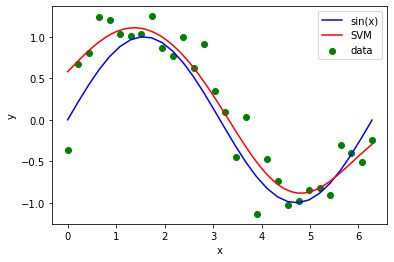

### Rozwiązanie